## Setup

In [1]:
# Packages
import pandas as pd
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import math

In [2]:
# Import data
tor_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/train_with_econ_wout_zeros.csv")


# Quick inspection
tor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 27 columns):
EVENT_ID              8237 non-null int64
DAMAGE_PROPERTY       8237 non-null float64
DURATION_SECONDS      8237 non-null float64
BEGIN_LAT             8237 non-null float64
BEGIN_LON             8237 non-null float64
TOR_LENGTH            8237 non-null float64
TOR_WIDTH             8237 non-null float64
BEGIN_DATE_TIME       8237 non-null float64
YEAR                  8237 non-null int64
CZ_NAME               8237 non-null object
STATE                 8237 non-null object
OPEN_WATER_PROP       8237 non-null float64
DEV_OPEN_PROP         8237 non-null float64
DEV_LOW_PROP          8237 non-null float64
DEV_MED_PROP          8237 non-null float64
DEV_HIGH_PROP         8237 non-null float64
DECID_FOREST_PROP     8237 non-null float64
EVERGR_FOREST_PROP    8237 non-null float64
MIXED_FOREST_PROP     8237 non-null float64
SHRUB_SCRUB_PROP      8237 non-null float64
GRASS_LAND_PROP    

In [5]:
# Seperating variables
# The dependent variables
tornado_outcomes = tor_df.iloc[:,
                               [1]].astype(float)


# Quick inspection
tornado_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 1 columns):
DAMAGE_PROPERTY    8237 non-null float64
dtypes: float64(1)
memory usage: 64.4 KB


In [9]:
# The independent variables
tornado_features = tor_df.iloc[:,
                               2:]


# Get rid of non-location and non-landcover variables
tornado_features = tornado_features.drop(["TOR_LENGTH",
                                          "DURATION_SECONDS",
                                          "TOR_WIDTH",
                                          "BEGIN_DATE_TIME",
                                          "YEAR",
                                          "CZ_NAME",
                                          "STATE"],
                                         axis = 1)


# Quick inspection
tornado_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 18 columns):
BEGIN_LAT             8237 non-null float64
BEGIN_LON             8237 non-null float64
OPEN_WATER_PROP       8237 non-null float64
DEV_OPEN_PROP         8237 non-null float64
DEV_LOW_PROP          8237 non-null float64
DEV_MED_PROP          8237 non-null float64
DEV_HIGH_PROP         8237 non-null float64
DECID_FOREST_PROP     8237 non-null float64
EVERGR_FOREST_PROP    8237 non-null float64
MIXED_FOREST_PROP     8237 non-null float64
SHRUB_SCRUB_PROP      8237 non-null float64
GRASS_LAND_PROP       8237 non-null float64
PASTURE_HAY_PROP      8237 non-null float64
CULT_CROPS_PROP       8237 non-null float64
WOOD_WETLAND_PROP     8237 non-null float64
HERB_WETLAND_PROP     8237 non-null float64
BARREN_LAND_PROP      8237 non-null float64
INCOME                8237 non-null float64
dtypes: float64(18)
memory usage: 1.1 MB


In [10]:
# Make the dependent variables into a numpy array
outcomes_array = tornado_outcomes.values


# Makes the numpy array into a torch Tensor
outcomes_Tensor = torch.from_numpy(outcomes_array)


# Quick inspection
outcomes_Tensor


 0.8345
 1.0039
 0.2808
   ⋮    
 0.8758
 0.8436
 1.0908
[torch.DoubleTensor of size 8237x1]

In [11]:
# Make the independent variables into a numpy array
features_array = tornado_features.values


# Make the numpy array into a torch Tensor
features_Tensor = torch.from_numpy(features_array)


# Quick inspection
features_Tensor


 1.2369e-02  8.2870e-01 -1.6177e+00  ...  -1.0901e+00 -3.2988e-01 -1.5643e+00
-1.7453e-01  1.3078e+00 -7.5109e-01  ...  -1.0901e+00 -1.3014e-01 -9.0186e-01
 9.1283e-01  2.3688e+00  1.8517e+00  ...   1.6831e+00  1.2739e+00  2.1723e+00
                ...                   ⋱                   ...                
-5.0102e-02  6.1062e-01 -2.5129e-01  ...  -1.0901e+00 -8.9784e-01 -1.8858e-01
 3.5682e-01 -1.1303e+00 -1.6177e+00  ...  -1.0901e+00 -8.9784e-01  1.9785e+00
-6.6390e-01  4.7054e-01 -3.6834e-01  ...  -6.9096e-01 -1.3006e-01 -1.1576e+00
[torch.DoubleTensor of size 8237x18]

### Convert DoubleTensor to FloatTensor

In [12]:
# Changing dependent variables from a DoubleTensor to a FloatTensor
outcomes_Tensor = outcomes_Tensor.float()


# ...and for the independent variables
features_Tensor = features_Tensor.float()


# Quick check
features_Tensor


 1.2369e-02  8.2870e-01 -1.6177e+00  ...  -1.0901e+00 -3.2988e-01 -1.5643e+00
-1.7453e-01  1.3078e+00 -7.5109e-01  ...  -1.0901e+00 -1.3014e-01 -9.0186e-01
 9.1283e-01  2.3688e+00  1.8517e+00  ...   1.6831e+00  1.2739e+00  2.1723e+00
                ...                   ⋱                   ...                
-5.0102e-02  6.1062e-01 -2.5129e-01  ...  -1.0901e+00 -8.9784e-01 -1.8858e-01
 3.5682e-01 -1.1303e+00 -1.6177e+00  ...  -1.0901e+00 -8.9784e-01  1.9785e+00
-6.6390e-01  4.7054e-01 -3.6834e-01  ...  -6.9096e-01 -1.3006e-01 -1.1576e+00
[torch.FloatTensor of size 8237x18]

## Round 1: One-Hidden-Layer Neural Network

In [13]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [14]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(18, 12),
                            torch.nn.ReLU(),
                            torch.nn.Linear(12, 1))

In [15]:
# Set the loss function
loss_fn = torch.nn.MSELoss(size_average=False)

In [16]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 9e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

In [17]:
# Get the iterations
iterations = list(range(0, 10000))

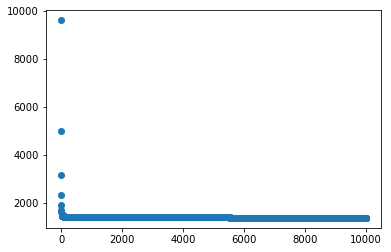

In [18]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [19]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8237)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

In [20]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
outcomes_Variable_resized = outcomes_Variable.resize(8237)


# Make the FloatTensor into a numpy.array
outcomes_array = outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
outcomes_list = outcomes_array.tolist()

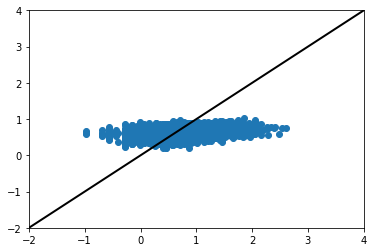

In [21]:
# Plot predictions versus training outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 1.1: Validation Set Performance

In [22]:
# Import data
valid_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/cv_with_econ_wout_zeros.csv")


# Validation set outcomes
valid_outcomes = valid_df.iloc[:, [1]]


# Make the validation outcomes into a numpy array
valid_outcomes_array = valid_outcomes.values


# Makes the numpy array into a torch Tensor
valid_outcomes_Tensor = torch.from_numpy(valid_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
valid_outcomes_Tensor = valid_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_outcomes_Variable = Variable(valid_outcomes_Tensor)

In [24]:
# Validation set predictors
valid_predictors = valid_df.iloc[:,
                                 2:]

# Get rid of non-location and non-landcover variables
valid_predictors = valid_predictors.drop(["TOR_LENGTH",
                                          "DURATION_SECONDS",
                                          "TOR_WIDTH",
                                          "BEGIN_DATE_TIME",
                                          "YEAR",
                                          "CZ_NAME",
                                          "STATE"],
                                         axis = 1)


# Make the validation predictors into a numpy array
valid_predictors_array = valid_predictors.values


# Makes the numpy array into a torch Tensor
valid_predictors_Tensor = torch.from_numpy(valid_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
valid_predictors_Tensor = valid_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_predictors_Variable = Variable(valid_predictors_Tensor)

In [25]:
valid_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Data columns (total 18 columns):
BEGIN_LAT             2730 non-null float64
BEGIN_LON             2730 non-null float64
OPEN_WATER_PROP       2730 non-null float64
DEV_OPEN_PROP         2730 non-null float64
DEV_LOW_PROP          2730 non-null float64
DEV_MED_PROP          2730 non-null float64
DEV_HIGH_PROP         2730 non-null float64
DECID_FOREST_PROP     2730 non-null float64
EVERGR_FOREST_PROP    2730 non-null float64
MIXED_FOREST_PROP     2730 non-null float64
SHRUB_SCRUB_PROP      2730 non-null float64
GRASS_LAND_PROP       2730 non-null float64
PASTURE_HAY_PROP      2730 non-null float64
CULT_CROPS_PROP       2730 non-null float64
WOOD_WETLAND_PROP     2730 non-null float64
HERB_WETLAND_PROP     2730 non-null float64
BARREN_LAND_PROP      2730 non-null float64
INCOME                2730 non-null float64
dtypes: float64(18)
memory usage: 384.0 KB


In [26]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(18, 12),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(12, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight

In [27]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 1559.2897
[torch.FloatTensor of size 1]

In [28]:
valid_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Data columns (total 18 columns):
BEGIN_LAT             2730 non-null float64
BEGIN_LON             2730 non-null float64
OPEN_WATER_PROP       2730 non-null float64
DEV_OPEN_PROP         2730 non-null float64
DEV_LOW_PROP          2730 non-null float64
DEV_MED_PROP          2730 non-null float64
DEV_HIGH_PROP         2730 non-null float64
DECID_FOREST_PROP     2730 non-null float64
EVERGR_FOREST_PROP    2730 non-null float64
MIXED_FOREST_PROP     2730 non-null float64
SHRUB_SCRUB_PROP      2730 non-null float64
GRASS_LAND_PROP       2730 non-null float64
PASTURE_HAY_PROP      2730 non-null float64
CULT_CROPS_PROP       2730 non-null float64
WOOD_WETLAND_PROP     2730 non-null float64
HERB_WETLAND_PROP     2730 non-null float64
BARREN_LAND_PROP      2730 non-null float64
INCOME                2730 non-null float64
dtypes: float64(18)
memory usage: 384.0 KB


In [29]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2730)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

In [30]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
valid_outcomes_Variable_resized = valid_outcomes_Variable.resize(2730)


# Make the FloatTensor into a numpy.array
valid_outcomes_array = valid_outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
valid_outcomes_list = valid_outcomes_array.tolist()

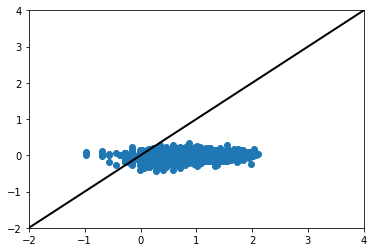

In [31]:
# Plot new predictions versus 'new' data
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

## Round 2: Two-Hidden-Layer Neural Network

In [32]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [33]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(18, 12),
                            torch.nn.ReLU(),
                            torch.nn.Linear(12, 8),
                            torch.nn.ReLU(),
                            torch.nn.Linear(8, 1))

In [34]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the mode
for t in range(10000):
    
    # Get current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current loss
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

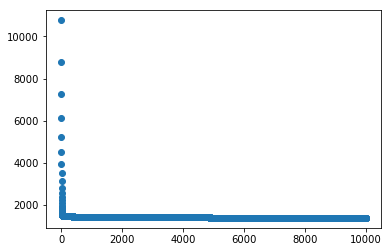

In [35]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [36]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8237)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

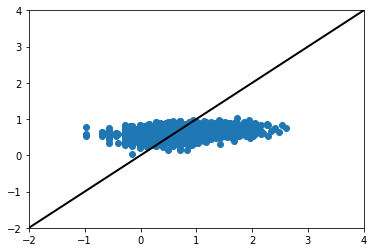

In [37]:
# Plot predictions versus training outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 2.1: Validation Set Performance

In [38]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(18, 12),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(12, 8),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(8, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight

In [42]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 1398.4102
[torch.FloatTensor of size 1]

In [43]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2730)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

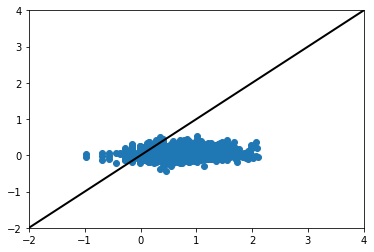

In [44]:
# Plot new predictions versus 'new' data
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

## Round 3: Three-Hidden-Layer Neural Network

In [45]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [46]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(18, 12),
                            torch.nn.ReLU(),
                            torch.nn.Linear(12, 8),
                            torch.nn.ReLU(),
                            torch.nn.Linear(8, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 1))

In [47]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the mode
for t in range(10000):
    
    # Get current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current loss
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

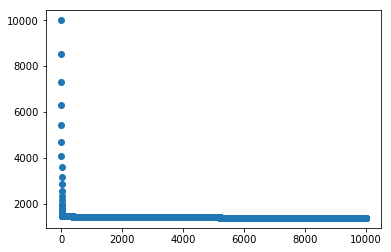

In [48]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [49]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8237)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

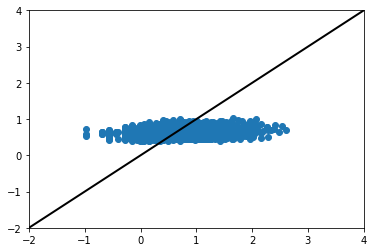

In [50]:
# Plot predictions versus training outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 3.1: Validation Set Performance

In [51]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(18, 12),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(12, 8),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(8, 5),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(5, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight
dim_corrected_model[(6)].weight = model[(6)].weight

In [52]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 1668.1876
[torch.FloatTensor of size 1]

In [53]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2730)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

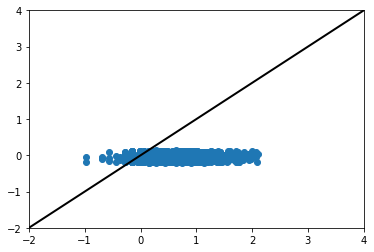

In [54]:
# Plot new predictions versus 'new' data
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

## Round 4: Four-Hidden Layer Neural Network

In [55]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [56]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(18, 12),
                            torch.nn.ReLU(),
                            torch.nn.Linear(12, 8),
                            torch.nn.ReLU(),
                            torch.nn.Linear(8, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 1))

In [57]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the mode
for t in range(10000):
    
    # Get current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current loss
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

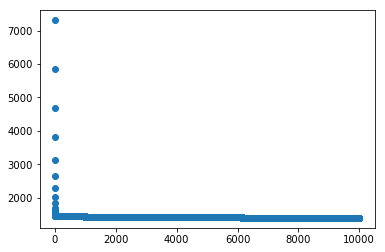

In [58]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [59]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8237)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

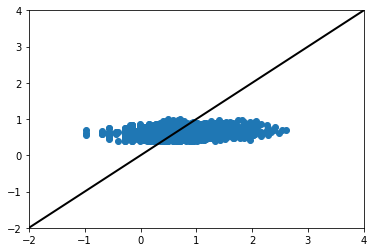

In [60]:
# Plot predictions versus training outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 4.1: Validation Set Performance

In [61]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(18, 12),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(12, 8),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(8, 5),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(5, 3),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(3, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight
dim_corrected_model[(6)].weight = model[(6)].weight
dim_corrected_model[(8)].weight = model[(8)].weight

In [62]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 3155.6758
[torch.FloatTensor of size 1]

In [63]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2730)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

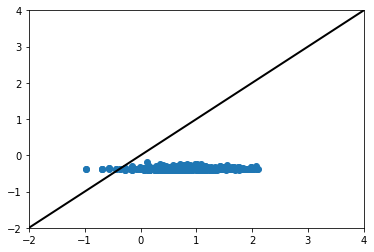

In [64]:
# Plot new predictions versus 'new' data
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

## Round 5: Five-Hidden-Layer Neural Network

In [65]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [66]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(18, 12),
                            torch.nn.ReLU(),
                            torch.nn.Linear(12, 8),
                            torch.nn.ReLU(),
                            torch.nn.Linear(8, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 2),
                            torch.nn.ReLU(),
                            torch.nn.Linear(2, 1))

In [67]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the mode
for t in range(10000):
    
    # Get current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current loss
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

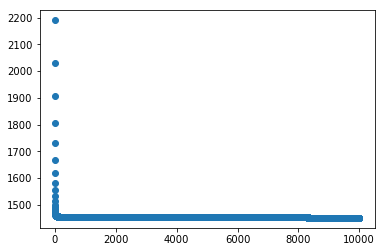

In [68]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [69]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8237)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

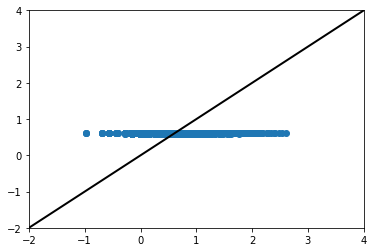

In [70]:
# Plot predictions versus training outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 5.1: Validation Set Performance

In [71]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(18, 12),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(12, 8),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(8, 5),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(5, 3),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(3, 2),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(2, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight
dim_corrected_model[(6)].weight = model[(6)].weight
dim_corrected_model[(8)].weight = model[(8)].weight
dim_corrected_model[(10)].weight = model[(10)].weight

In [72]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 1299.9486
[torch.FloatTensor of size 1]

In [73]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2730)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

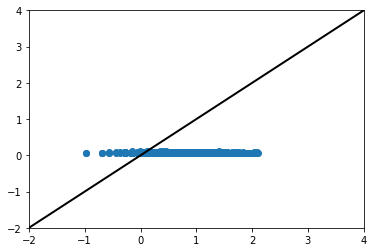

In [74]:
# Plot new predictions versus 'new' data
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

## Round 6: Linear Regression

In [75]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [76]:
# Make the neural network - really a regression
model = torch.nn.Sequential(torch.nn.Linear(18, 1))

In [77]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-6


# Train the neural network
for t in range(10000):
    
    # Get the current prediction
    y_pred = model(features_Variable)
    
    # Compute and append loss
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

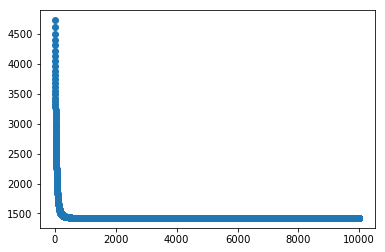

In [78]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [79]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8237)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

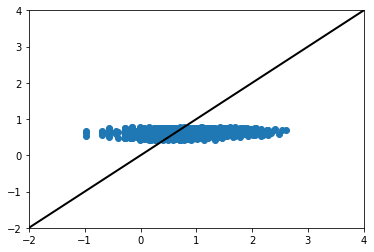

In [80]:
# Plot predictions versus training outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 6.1: Validation Set Performance

In [81]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(18, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight

In [82]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 1265.3546
[torch.FloatTensor of size 1]

In [83]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2730)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

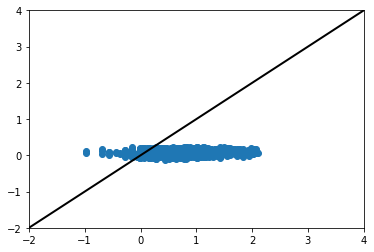

In [84]:
# Plot new predictions versus 'new' data
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)